# European Social Survey
Data file: https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv<br>
Code book:https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_ess = pd.read_csv('ESSdata_Thinkful.csv')
df_ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1)Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

CH: Swizerland,   CZ: Czech Republic,   DE: Germany,

ES: Spain,        NO: Norway,           SE: Sweden,

6: 2012,   7: 2014


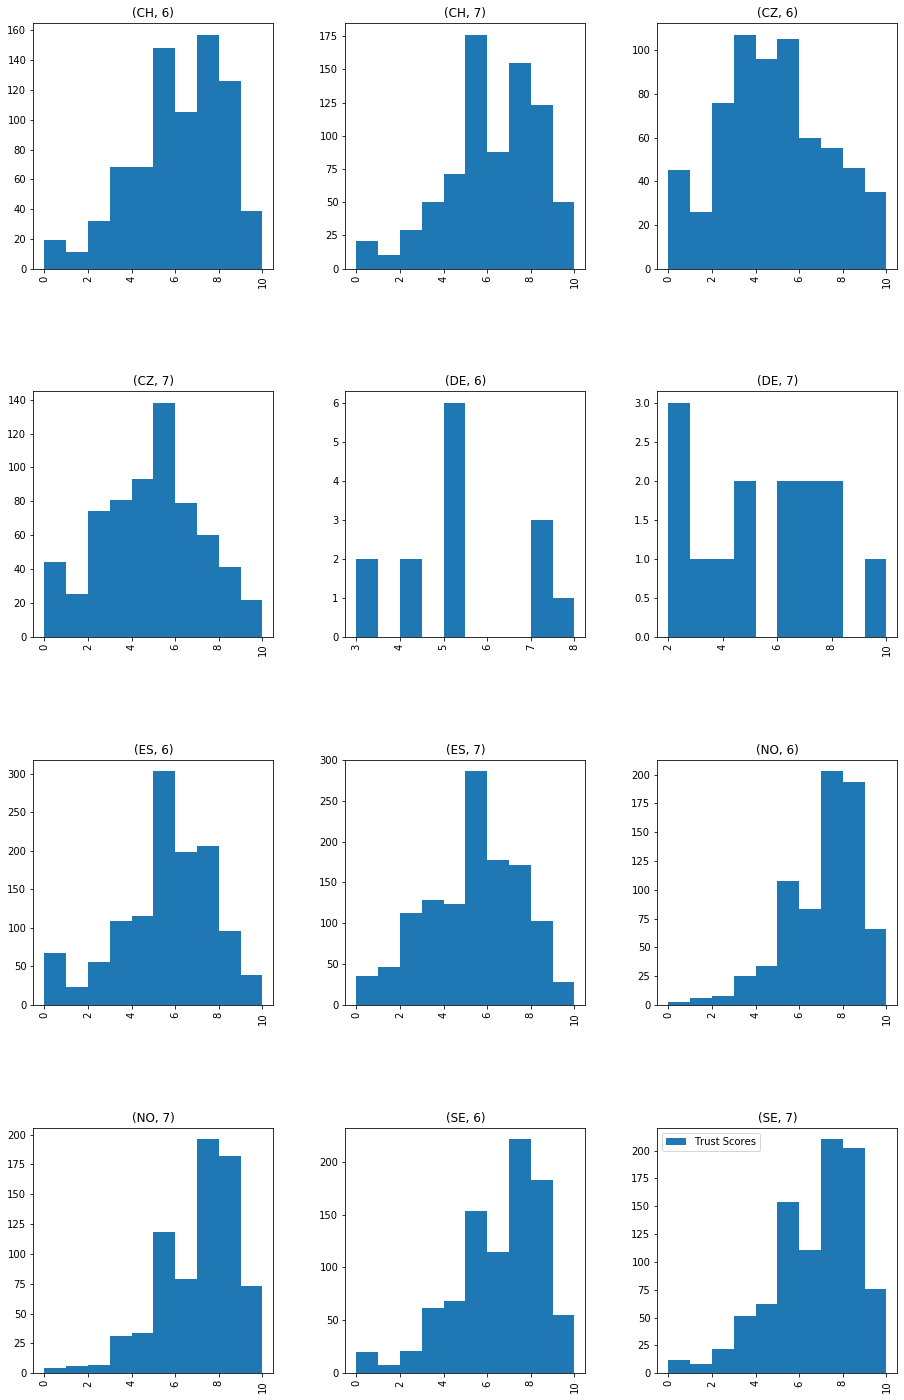

In [17]:
print('CH: Swizerland,   CZ: Czech Republic,   DE: Germany,\n')
print('ES: Spain,        NO: Norway,           SE: Sweden,\n')
print('6: 2012,   7: 2014')

plt.rcParams['figure.figsize'] = [15,25]
df_ess.hist(by=['cntry', 'year'], column='ppltrst', label='Trust Scores')
plt.legend()
plt.show()

From the graphs we cannot say a certain thing about their normally disribution, so we run The Shapiro-Wilk test to test their normality.

In [20]:
# Drop missing values
df_ess = df_ess.dropna()

country_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
years = [6, 7]
alpha = 0.05

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    print(country,'\n')
    for year in years:
        stat, p = stats.shapiro(df['ppltrst'][df['year']==year])
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
                
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

CH 

  Statistics=0.952, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.955, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

  Statistics=0.968, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.972, p=0.000
  Sample does not look Gaussian (reject H0)

DE 

  Statistics=0.893, p=0.107
  Sample looks Gaussian (fail to reject H0)

  Statistics=0.943, p=0.452
  Sample looks Gaussian (fail to reject H0)

ES 

  Statistics=0.949, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.966, p=0.000
  Sample does not look Gaussian (reject H0)

NO 

  Statistics=0.921, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.929, p=0.000
  Sample does not look Gaussian (reject H0)

SE 

  Statistics=0.937, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.938, p=0.000
  Sample does not look Gaussian (reject H0)



Because just Spain has a normal disribution, we use non-parametric tests to compare the trust data between the countries.

In [27]:
df_ess = pd.read_csv('ESSdata_Thinkful.csv') # we need to have equal N for running wilcoxon test
for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==6]
    df_2014 = df[df['year']==7]

    print(country,'\n')

    stat, p = stats.wilcoxon(df_2012['ppltrst'],df_2014['ppltrst'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
        
    if p > alpha:
        print('  No statistical difference in distribution  (fail to reject H0)\n')
    else:
        print('  Statistical difference in distribution (reject H0)\n')

CH 

  Statistics=106278.500, p=0.441
  No statistical difference in distribution  (fail to reject H0)

CZ 

  Statistics=82837.000, p=0.293
  No statistical difference in distribution  (fail to reject H0)

DE 

  Statistics=44.000, p=0.916
  No statistical difference in distribution  (fail to reject H0)

ES 

  Statistics=243475.500, p=0.006
  Statistical difference in distribution (reject H0)

NO 

  Statistics=85392.000, p=0.614
  No statistical difference in distribution  (fail to reject H0)

SE 

  Statistics=130719.500, p=0.029
  Statistical difference in distribution (reject H0)



The Wilcoxon Signed-Rank test show that there are significant differences between the 2012 and 2014 levels of trust in Spain and Sweden.

In [28]:
country_list = ['ES','SE']

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==6]
    df_2014 = df[df['year']==7]

    print(country, '\n')

    diff = df_2012['ppltrst'].mean() - df_2014['ppltrst'].mean()
    print(diff, '\n') 
    print()
    if diff > 0:
        print('  Net trust increased between years.\n')
    else:
        print('  Net trust decreased between years.\n')

ES 

0.2194639274634893 


  Net trust increased between years.

SE 

-0.19921035485408023 


  Net trust decreased between years.



### 2)Did people become happier from 2012 to 2014? Compute results for each country in the sample.

CH: Swizerland,   CZ: Czech Republic,   DE: Germany,

ES: Spain,        NO: Norway,           SE: Sweden,

6: 2012,   7: 2014


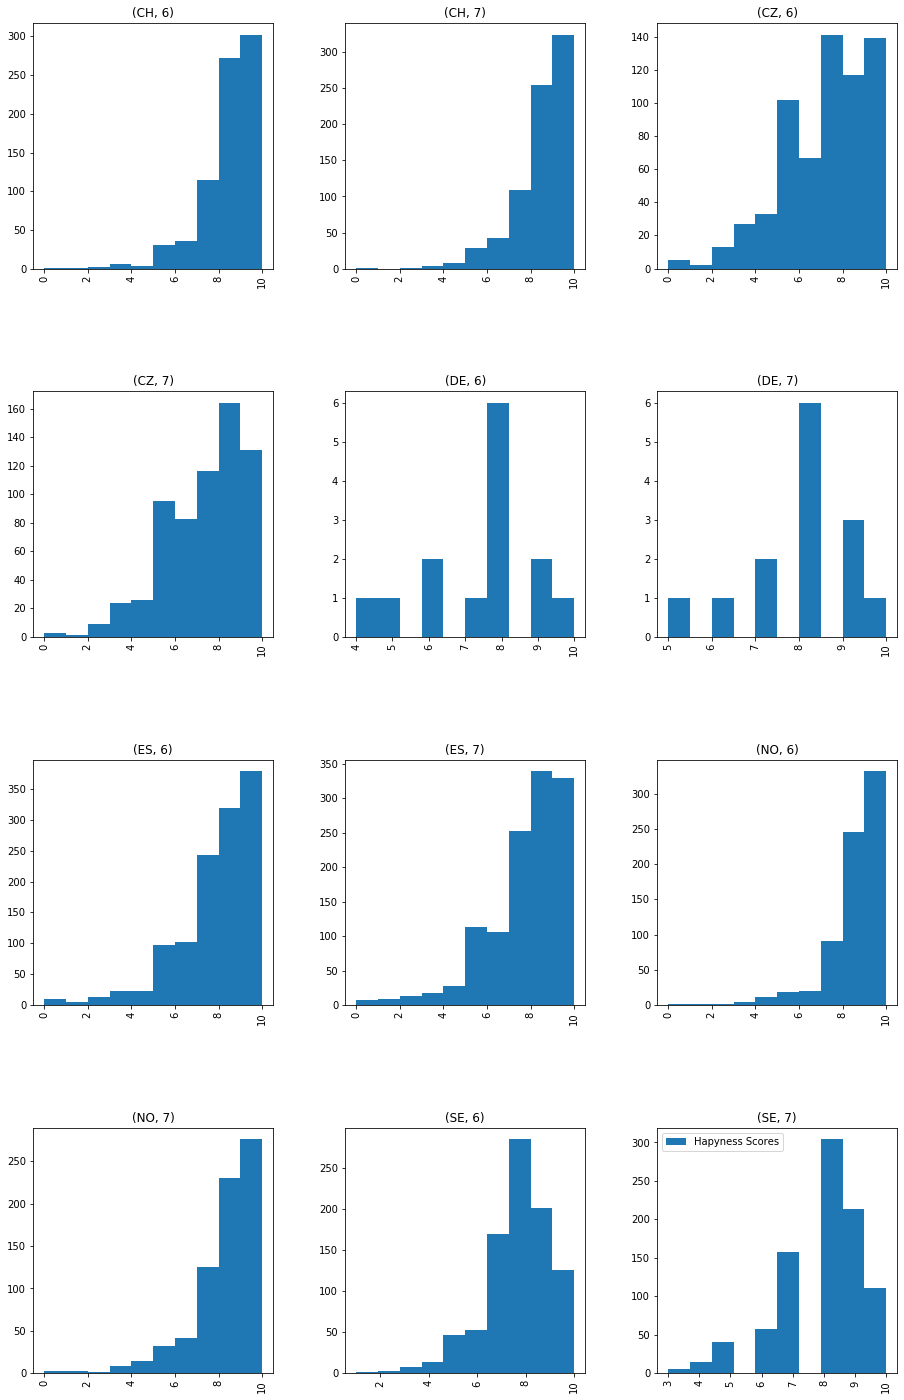

In [29]:
print('CH: Swizerland,   CZ: Czech Republic,   DE: Germany,\n')
print('ES: Spain,        NO: Norway,           SE: Sweden,\n')
print('6: 2012,   7: 2014')

plt.rcParams['figure.figsize'] = [15,25]
df_ess.hist(by=['cntry', 'year'], column='happy', label='Hapyness Scores')
plt.legend()
plt.show()

None of the country distributions look normal, but we run a shapiro -wilks test just to make sure.

In [35]:
df_essd = df_ess.dropna()
country_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
for country in country_list:
    df = df_essd[df_essd['cntry']==country]
    print(country, '\n')
    for year in years:
        stat, p = stats.shapiro(df['happy'][df['year']==year])
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

CH 

  Statistics=0.877, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.895, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

  Statistics=0.946, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.945, p=0.000
  Sample does not look Gaussian (reject H0)

DE 

  Statistics=0.916, p=0.222
  Sample looks Gaussian (fail to reject H0)

  Statistics=0.921, p=0.230
  Sample looks Gaussian (fail to reject H0)

ES 

  Statistics=0.905, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.914, p=0.000
  Sample does not look Gaussian (reject H0)

NO 

  Statistics=0.850, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.880, p=0.000
  Sample does not look Gaussian (reject H0)

SE 

  Statistics=0.903, p=0.000
  Sample does not look Gaussian (reject H0)

  Statistics=0.912, p=0.000
  Sample does not look Gaussian (reject H0)



Since the majority of countries do not have normal disributions, we will apply a non parametric test.

In [36]:
for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==6]
    df_2014 = df[df['year']==7]

    print(country)
    print()

    stat, p = stats.wilcoxon(df_2012['happy'],df_2014['happy'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
        
    if p > alpha:
        print('  No statistical difference in distribution  (fail to reject H0)\n')
    else:
        print('  Statistical difference in distribution (reject H0)\n')

CH

  Statistics=92816.500, p=0.821
  No statistical difference in distribution  (fail to reject H0)

CZ

  Statistics=73213.000, p=0.011
  Statistical difference in distribution (reject H0)

DE

  Statistics=23.500, p=0.393
  No statistical difference in distribution  (fail to reject H0)

ES

  Statistics=231958.500, p=0.049
  Statistical difference in distribution (reject H0)

NO

  Statistics=67571.500, p=0.000
  Statistical difference in distribution (reject H0)

SE

  Statistics=125481.000, p=0.514
  No statistical difference in distribution  (fail to reject H0)



The Wilcoxon Signed-Rank test show that there are significant differences between the 2012 and 2014 levels of trust in Czech Republic, Spain, and Norway.

In [37]:
country_list_happy = ['CZ','NO','ES']

for country in country_list_happy:
    df = df_ess[df_ess['cntry']==country]
    
    df_2012 = df[df['year']==6]
    df_2014 = df[df['year']==7]

    print(country, '\n')

    diff = df_2012['happy'].mean() - df_2014['happy'].mean()
    print(diff) 
    if diff > 0:
        print('  Net happiness increased between years.\n')
    else:
        print('  Net happiness decreased between years.\n')

CZ 

-0.1432125966305149
  Net happiness decreased between years.

NO 

0.33653471625046905
  Net happiness increased between years.

ES 

0.12871287128712883
  Net happiness increased between years.



### 3)Who reported watching more TV in 2012, men or women?

In [4]:
df_2012 = df_ess[df_ess['year']==6]
df_2012.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [7]:
men = df_2012[df_2012['gndr'] == 1.0]
women = df_2012[df_2012['gndr'] == 2.0]

In [8]:
men.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,2.154000e+03,2154.0,2151.000000,2152.000000,2145.000000,2146.000000,2145.000000,2151.000000,2132.000000,2154.0,2089.000000,2152.000000
mean,3.447705e+04,6.0,3.901906,5.629182,5.947786,5.291240,7.744522,5.228266,2.779550,1.0,46.965055,1.353625
std,5.797237e+05,0.0,1.983690,2.206040,2.128799,2.173261,1.722329,1.466672,0.917116,0.0,17.969622,0.478205
min,1.000000e+01,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,15.000000,1.000000
25%,1.057250e+03,6.0,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.0,33.000000,1.000000
50%,1.800000e+03,6.0,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.0,46.000000,1.000000
75%,2.799750e+03,6.0,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,1.0,61.000000,2.000000
max,1.100140e+07,6.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,1.0,103.000000,2.000000


In [9]:
women.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,2.143000e+03,2143.0,2140.000000,2135.000000,2132.000000,2136.000000,2131.000000,2137.000000,2119.000000,2143.0,2082.000000,2138.000000
mean,4.464775e+04,6.0,3.944393,5.496487,6.048311,5.486891,7.702487,5.226954,2.700802,2.0,48.086455,1.399906
std,6.708246e+05,0.0,2.049457,2.263740,2.142947,2.165044,1.806792,1.491381,0.911657,0.0,18.407926,0.489993
min,1.000000e+00,6.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.0,15.000000,1.000000
25%,1.048500e+03,6.0,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,2.0,34.000000,1.000000
50%,1.638000e+03,6.0,4.000000,6.000000,6.000000,6.000000,8.000000,6.000000,3.000000,2.0,48.000000,1.000000
75%,2.688500e+03,6.0,6.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.0,62.000000,2.000000
max,1.100143e+07,6.0,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.0,97.000000,2.000000


In total women watched more TV than Men.

In [6]:
country_list = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
alpha = 0.05

In [12]:
print('1: Male     2: Female')

for country in country_list:
    df = df_2012[df_2012['cntry']==country]
    print(country, '\n')
    for gender in [1, 2]:
        stat, p = stats.shapiro(df['tvtot'][df['gndr']==gender])
        print(gender)
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

1: Male     2: Female
CH 

1
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

2
  Statistics=0.946, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

1
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

2
  Statistics=nan, p=1.000
  Sample looks Gaussian (fail to reject H0)

DE 

1
  Statistics=0.825, p=0.097
  Sample looks Gaussian (fail to reject H0)

2
  Statistics=0.871, p=0.155
  Sample looks Gaussian (fail to reject H0)

ES 

1
  Statistics=0.932, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.928, p=0.000
  Sample does not look Gaussian (reject H0)

NO 

1
  Statistics=0.946, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.950, p=0.000
  Sample does not look Gaussian (reject H0)

SE 

1
  Statistics=0.957, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.953, p=0.000
  Sample does not look Gaussian (reject H0)



In [13]:
print('1: Male     2: Female')

for country in country_list:
    df = df_ess[df_ess['cntry']==country]
    
    df_tv_f = df[df['gndr']==2]
    df_tv_m = df[df['gndr']==1]

    print(country, '\n')

    stat, p = stats.mannwhitneyu(df_tv_f['tvtot'], df_tv_m['tvtot'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('  Same distribution (fail to reject H0)\n')
    else:
        print('  Different distribution (reject H0)\n')

1: Male     2: Female
CH 

  Statistics=281667.000, p=0.026
  Different distribution (reject H0)

CZ 

  Statistics=199064.000, p=0.021
  Different distribution (reject H0)

DE 

  Statistics=93.500, p=0.462
  Same distribution (fail to reject H0)

ES 

  Statistics=721821.500, p=0.209
  Same distribution (fail to reject H0)

NO 

  Statistics=250741.500, p=0.028
  Different distribution (reject H0)

SE 

  Statistics=407158.500, p=0.352
  Same distribution (fail to reject H0)



There are statistical diffences in total tv averages  in Switzerland, Czech Republic, and Norway.

In [53]:
country_list_tv = ['CH','CZ','NO']

for country in country_list_tv:
    df = df_ess[df_ess['cntry']==country]
    
    df_tv_f = df[df['gndr']==2]
    df_tv_m = df[df['gndr']==1]

    print(country)
    
    
    f_total = df_tv_f['tvtot'].sum()
    m_total = df_tv_m['tvtot'].sum()
    
    if f_total > m_total:
        print('Females watched more tv.\n')
    else:
        print('Males watched more tv.\n')

CH
Males watched more tv.

CZ
Females watched more tv.

NO
Males watched more tv.



### 4)Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [52]:
print('1: Together      2: Alone')

alpha = 0.05

for country in country_list:
    df = df_2012d[df_2012d['cntry']==country]
    print(country, '\n')
    for pt in [1, 2]:
        stat, p = stats.shapiro(df['pplfair'][df['partner']==pt])
        print(pt)
        print('  Statistics=%.3f, p=%.3f' % (stat, p))    
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

1: Together      2: Alone
CH 

1
  Statistics=0.944, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.942, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

1
  Statistics=0.968, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.973, p=0.000
  Sample does not look Gaussian (reject H0)

DE 

1
  Statistics=0.897, p=0.273
  Sample looks Gaussian (fail to reject H0)

2
  Statistics=0.852, p=0.201
  Sample looks Gaussian (fail to reject H0)

ES 

1
  Statistics=0.948, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.957, p=0.000
  Sample does not look Gaussian (reject H0)

NO 

1
  Statistics=0.907, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.931, p=0.000
  Sample does not look Gaussian (reject H0)

SE 

1
  Statistics=0.933, p=0.000
  Sample does not look Gaussian (reject H0)

2
  Statistics=0.926, p=0.000
  Sample does not look Gaussian (reject H0)



Looks just Germany has a normal distribution, again because majority of disributions are not normal, we run non-parametric test. Then we can run a parametric test for Germany.  

In [58]:
country_list_pt = ['CH', 'CZ', 'ES', 'NO', 'SE']

alpha = 0.05

for country in country_list_pt:
    df = df_2012d[df_2012d['cntry']==country]
    
    df_tv_t = df[df['partner']==1]
    df_tv_a = df[df['partner']==2]

    print(country)
    print()

    stat, p = stats.ttest_ind(df_tv_t['pplfair'], df_tv_a['pplfair'], equal_var = False)
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    
    if p > alpha:
        print('  Same distribution (fail to reject H0)\n')
    else:
        print('  Different distribution (reject H0)\n')

CH

  Statistics=2.207, p=0.028
  Different distribution (reject H0)

CZ

  Statistics=0.592, p=0.554
  Same distribution (fail to reject H0)

ES

  Statistics=-0.698, p=0.485
  Same distribution (fail to reject H0)

NO

  Statistics=1.074, p=0.283
  Same distribution (fail to reject H0)

SE

  Statistics=2.770, p=0.006
  Different distribution (reject H0)



In [59]:
for country in country_list_pt:
    df = df_2012d[df_2012d['cntry']==country]
    
    df_tv_t = df[df['partner']==1]
    df_tv_a = df[df['partner']==2]

    print(country)
    
    
    t_avg = df_tv_t['pplfair'].mean()
    a_avg = df_tv_a['pplfair'].mean()
    
    if t_avg > a_avg:
        print('People who lived with a partner felt that people were fairer in 2012.\n')
    else:
        print('People who lived alone felt that people were fairer in 2012.\n')

CH
People who lived with a partner felt that people were fairer in 2012.

CZ
People who lived with a partner felt that people were fairer in 2012.

ES
People who lived alone felt that people were fairer in 2012.

NO
People who lived with a partner felt that people were fairer in 2012.

SE
People who lived with a partner felt that people were fairer in 2012.



In [64]:
# For Germany - Parametric test

df = df_2012d[df_2012d['cntry']=='DE']    
df_t = df[df['partner']==1]
df_a = df[df['partner']==2]

print('Germany\n')

stat, p = stats.mannwhitneyu(df_t['pplfair'], df_a['pplfair'])
print('  Statistics=%.3f, p=%.3f' % (stat, p))
    
if p > alpha:
    print('  Same distribution (fail to reject H0)\n')
else:
    print('  Different distribution (reject H0)\n')

Germany

  Statistics=5.500, p=0.019
  Different distribution (reject H0)



In [65]:
df = df_2012d[df_2012d['cntry']=='DE']
    
df_tv_t = df[df['partner']==1]
df_tv_a = df[df['partner']==2]

print('Germany')
    
    
t_avg = df_tv_t['pplfair'].mean()
a_avg = df_tv_a['pplfair'].mean()
    
if t_avg > a_avg:
    print('People who lived with a partner felt that people were fairer in 2012.\n')
else:
    print('People who lived alone felt that people were fairer in 2012.\n')

Germany
People who lived with a partner felt that people were fairer in 2012.



### 5)Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [67]:
df_2014 = df_ess[df_ess['year']==7]
df_2014d = df_2014.dropna()

country_list_s = ['CH','CZ','DE', 'SE']

alpha = 0.05

for country in country_list_s:
    df = df_2014d[df_2014d['cntry']==country]
    print(country, '\n')
    
    stat, p = stats.shapiro(df['sclmeet'])
    print('  Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
        
    if p > alpha:
        print('  Sample looks Gaussian (fail to reject H0)\n')
    else:
        print('  Sample does not look Gaussian (reject H0)\n')

CH 

  Statistics=0.898, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

  Statistics=0.944, p=0.000
  Sample does not look Gaussian (reject H0)

DE 

  Statistics=0.862, p=0.032
  Sample does not look Gaussian (reject H0)

SE 

  Statistics=0.878, p=0.000
  Sample does not look Gaussian (reject H0)



In [70]:
# Kruskal-Wallace Test

Switzerland = df_2014d[df_2014d['cntry']=='CH']['sclmeet']
Czech_Republic = df_2014d[df_2014d['cntry']=='CZ']['sclmeet']
Germany = df_2014d[df_2014d['cntry']=='DE']['sclmeet']
Sweden = df_2014d[df_2014d['cntry']=='SE']['sclmeet']

print('Switzerland:\navg = {}, std =  {}\n'.format(Switzerland.mean(), Switzerland.std()))
print('Czech Republic: \navg = {}, std = {}\n'.format(Czech_Republic.mean(), Czech_Republic.std()))
print('Germany:\navg = {}, std = {}\n'.format(Germany.mean(), Germany.std()))
print('Sweden:\navg = {}, std = {}'.format(Sweden.mean(), Sweden.std()))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(Switzerland,Czech_Republic,Germany,Sweden)

Switzerland:
avg = 5.174966352624495, std =  1.3016961639257436

Czech Republic: 
avg = 4.4950495049504955, std = 1.4712029982324069

Germany:
avg = 4.428571428571429, std = 0.7559289460184544

Sweden:
avg = 5.434832756632065, std = 1.3707047338425682


KruskalResult(statistic=162.23842058345167, pvalue=6.026207477104715e-35)

Social meetings are statistically disticnt between the four countries, Sweden has the highest social meeting likelihood, while Germany has the lowest.

### 6)Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [85]:
df_2014d['age_groups'] = pd.cut(x=df_2014d['agea'], 
                                    bins=[15, 25, 45, 70, 115],
                                   labels = ['15-25','26-45', '46-70', '71-115'])

In [86]:
country_list_a = ['CH','CZ', 'SE']

bins_list = ['15-25','26-45', '46-70', '71-115']

for country in country_list_a:
    
    df = df_2014d[df_2014d['cntry']==country]
    print(country, '\n')
    
    for b in bins_list:
        
        df_bin = df[df['age_groups']==b]
        print(b)                                                               
        stat, p = stats.shapiro(df_bin['sclmeet']) 
        print('  Statistics=%.3f, p=%.3f' % (stat, p))
        
        if p > alpha:
            print('  Sample looks Gaussian (fail to reject H0)\n')
        else:
            print('  Sample does not look Gaussian (reject H0)\n')

CH 

15-25
  Statistics=0.809, p=0.000
  Sample does not look Gaussian (reject H0)

26-45
  Statistics=0.884, p=0.000
  Sample does not look Gaussian (reject H0)

46-70
  Statistics=0.916, p=0.000
  Sample does not look Gaussian (reject H0)

71-115
  Statistics=0.916, p=0.000
  Sample does not look Gaussian (reject H0)

CZ 

15-25
  Statistics=0.878, p=0.000
  Sample does not look Gaussian (reject H0)

26-45
  Statistics=0.939, p=0.000
  Sample does not look Gaussian (reject H0)

46-70
  Statistics=0.942, p=0.000
  Sample does not look Gaussian (reject H0)

71-115
  Statistics=0.926, p=0.024
  Sample does not look Gaussian (reject H0)

SE 

15-25
  Statistics=0.823, p=0.000
  Sample does not look Gaussian (reject H0)

26-45
  Statistics=0.827, p=0.000
  Sample does not look Gaussian (reject H0)

46-70
  Statistics=0.898, p=0.000
  Sample does not look Gaussian (reject H0)

71-115
  Statistics=0.916, p=0.000
  Sample does not look Gaussian (reject H0)



In [91]:
# Kruskal-Wallace Test

Switzerland = df_2014d[df_2014d['cntry']=='CH']
Czech_Republic = df_2014d[df_2014d['cntry']=='CZ']
Sweden = df_2014d[df_2014d['cntry']=='SE']

bins_list = ['15-25','26-45', '46-70', '71-115']

print('Switzerland')
for b in bins_list:
    print('{}: avg = {}, std = {}'.format(b, Switzerland[Switzerland['age_groups']==b]['sclmeet'].mean(),
                                         Switzerland[Switzerland['age_groups']==b]['sclmeet'].std()))
print('Czech Republic')
for b in bins_list:
    print('{}: avg = {}, std = {}'.format(b, Czech_Republic[Czech_Republic['age_groups']==b]['sclmeet'].mean(),
                                         Czech_Republic[Czech_Republic['age_groups']==b]['sclmeet'].std()))
print('Sweden')
for b in bins_list:
    print('{}: avg = {}, std = {}'.format(b, Sweden[Sweden['age_groups']==b]['sclmeet'].mean(),
                                         Sweden[Sweden['age_groups']==b]['sclmeet'].std()))



# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
print()
print('15-25:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_groups']=='15-25']['sclmeet'],
              Czech_Republic[Czech_Republic['age_groups']=='15-25']['sclmeet'],
              Sweden[Sweden['age_groups']=='15-25']['sclmeet'])))
print('26-45:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_groups']=='26-45']['sclmeet'],
              Czech_Republic[Czech_Republic['age_groups']=='26-45']['sclmeet'],
              Sweden[Sweden['age_groups']=='26-45']['sclmeet'])))
print('46-70:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_groups']=='46-70']['sclmeet'],
              Czech_Republic[Czech_Republic['age_groups']=='46-70']['sclmeet'],
              Sweden[Sweden['age_groups']=='46-70']['sclmeet'])))
print('71-115:')
print('{}\n'.format(stats.kruskal(Switzerland[Switzerland['age_groups']=='71-115']['sclmeet'],
              Czech_Republic[Czech_Republic['age_groups']=='71-115']['sclmeet'],
              Sweden[Sweden['age_groups']=='71-115']['sclmeet'])))

Switzerland
15-25: avg = 5.674242424242424, std = 1.1754239912059292
26-45: avg = 5.2946058091286305, std = 1.169193075643531
46-70: avg = 5.0, std = 1.3493659735097627
71-115: avg = 4.666666666666667, std = 1.390174186806431
Czech Republic
15-25: avg = 5.206185567010309, std = 1.5608367436110002
26-45: avg = 4.373271889400922, std = 1.4154651390949808
46-70: avg = 4.439688715953308, std = 1.3881687227148376
71-115: avg = 3.6470588235294117, std = 1.4746823580151076
Sweden
15-25: avg = 5.817518248175182, std = 1.2200468777287745
26-45: avg = 5.71889400921659, std = 1.3120745069782014
46-70: avg = 5.264305177111717, std = 1.4039001079741542
71-115: avg = 5.007142857142857, std = 1.3276063198840593

15-25:
KruskalResult(statistic=10.81216649272808, pvalue=0.0044891888688544535)

26-45:
KruskalResult(statistic=107.25867993576973, pvalue=5.117685386939172e-24)

46-70:
KruskalResult(statistic=51.44035849743176, pvalue=6.758776396340139e-12)

71-115:
KruskalResult(statistic=21.40310200866386